 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
print(whale_df.isnull().sum().sum())



4


In [5]:
# Drop nulls

whale_df = whale_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


In [6]:
# Count nulls
print(whale_df.isnull().sum().sum())


0


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [8]:
# Count nulls
print(algo_df.isnull().sum().sum())

6


In [9]:
# Drop nulls
algo_df = algo_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_data = Path("Resources/sp_tsx_history.csv")
sp_df = pd.read_csv(sp_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df['Close'] = sp_df['Close'].replace('[$,]', '', regex=True).astype(float)


In [11]:
# Check Data Types
sp_df.dtypes

Close    float64
dtype: object

In [12]:
# Fix Data Type
sp_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [13]:
# Calculate Daily Returns
sp_dailyReturns = sp_df.pct_change().dropna()
sp_dailyReturns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
# Drop nulls


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_dailyReturns= sp_dailyReturns.rename( columns={ "Close": "S&P TSX"})
sp_dailyReturns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_dailyReturns = pd.concat([whale_df, algo_df, sp_dailyReturns], axis="columns", join="inner")
all_dailyReturns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

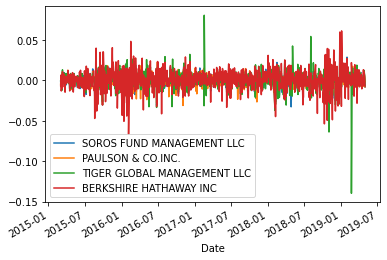

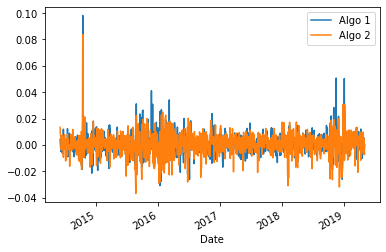

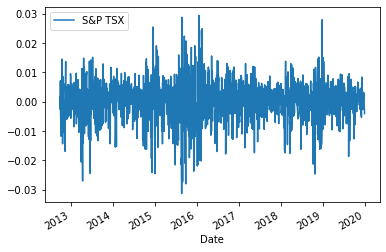

In [17]:
# Plot daily returns of all portfolios
whale_df.plot()
algo_df.plot()
sp_dailyReturns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

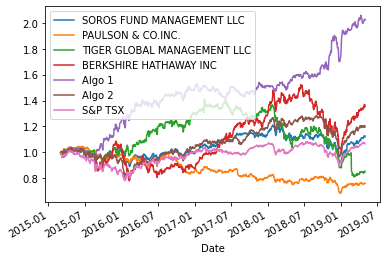

In [18]:
# Calculate cumulative returns of all portfolios
all_cumulativeReturns = (1 + all_dailyReturns).cumprod()
# Plot cumulative returns
all_cumulativeReturns.plot()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

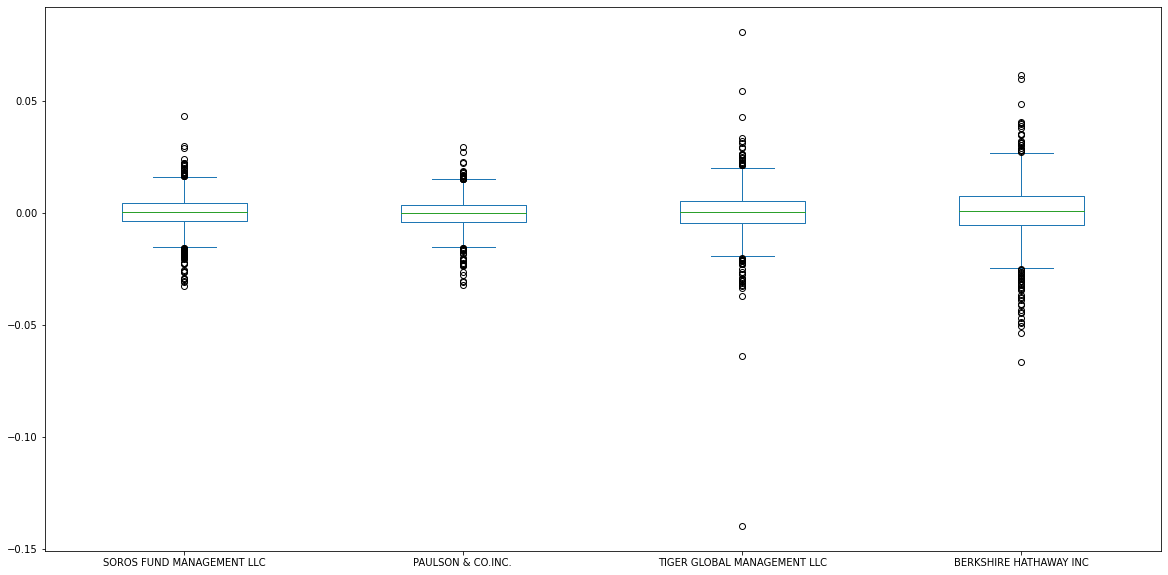

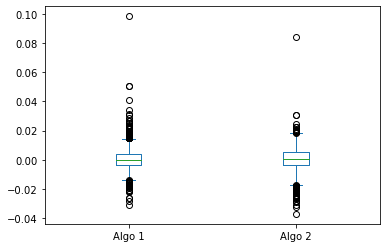

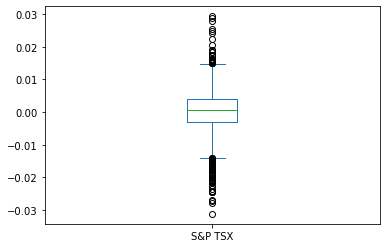

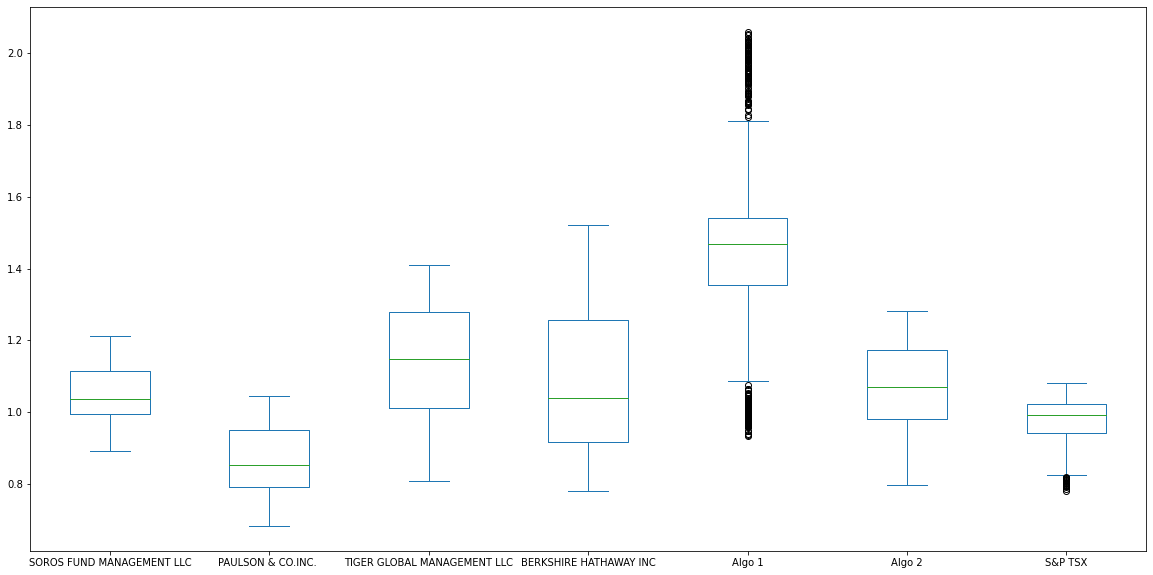

In [19]:
# Box plot to visually show risk
whale_df.plot.box(figsize = [20,10])
algo_df.plot.box()
sp_dailyReturns.plot.box()
all_cumulativeReturns.plot.box(figsize = [20,10])

### Calculate Standard Deviations

In [48]:
# Calculate the daily standard deviations of all portfolios
all_dailyReturns_std = all_dailyReturns.std().sort_values(ascending = False)
all_dailyReturns_std.head()

shopify-dailyReturns           0.031754
BERKSHIRE HATHAWAY INC         0.014328
otex-dailyReturns              0.014218
TIGER GLOBAL MANAGEMENT LLC    0.013848
l-dailyReturns                 0.010262
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [49]:
# Calculate  the daily standard deviation of S&P TSX 60
whale_std = whale_df.std()
algo_std = algo_df.std()
sp_std = sp_dailyReturns.std()
# Determine which portfolios are riskier than the S&P TSX 60
#to figure out the risk of a certain portfolio I am calculating the mean std of each portfolio and using that the measure each portfolios risk
if whale_std.mean() > sp_std.mean():
    print(f"whale portfolio with a std of {whale_std.mean()} is more risky then the S&P with {sp_std.mean()}")
elif algo_std.mean() > sp_std.mean():
    print(f"Algo portfolio with a std of {algo_std.mean()} is more risky then the S&P with {sp_std.mean()}")
elif algo_std.mean() > sp_std.mean() and whale_std.mean() > sp_std.mean():
    print(f" whale portfolio with a std of {whale_std.mean()} and Algo portfolio with a std of {algo_std.mean()} are both more risk than the S&p with {sp_std.mean()}")








whale portfolio with a std of 0.009618471706059247 is more risky then the S&P with 0.006637362556692504


### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_dailyReturns_std* np.sqrt(252)
annualized_std.head()

shopify-dailyReturns           0.504079
BERKSHIRE HATHAWAY INC         0.227445
otex-dailyReturns              0.225703
TIGER GLOBAL MANAGEMENT LLC    0.219833
l-dailyReturns                 0.162907
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

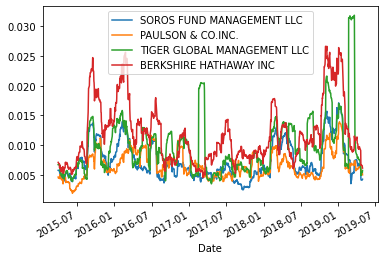

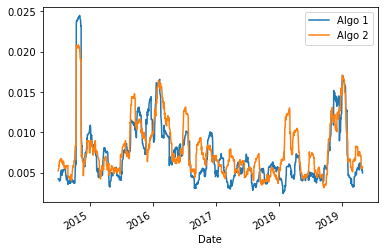

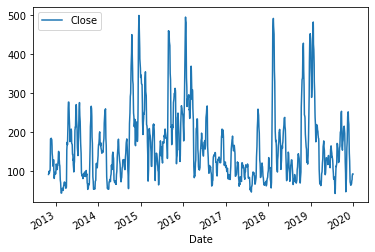

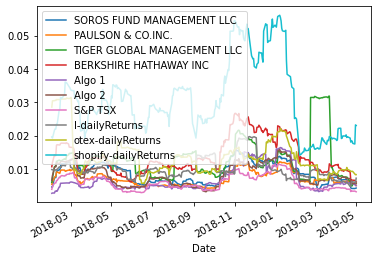

In [51]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_df.rolling(window=21).std().plot()
algo_df.rolling(window=21).std().plot()
sp_df.rolling(window=21).std().plot()
all_dailyReturns.rolling(window=21).std().plot() 
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [52]:
#in the instructions is says to compare every single stock to the S&P
#I thought it would make more sense just to find the meand of each portfolio and compare it that way is that
#is the whole point of the task
# bellow i have left some code (commented out) below of me comparing each stock individually 


## # Calculate the correlation
# tiger_compare = pd.concat([whale_df.drop(whale_df.columns[[0, 1, 3]], axis = 1), sp_dailyReturns], axis="columns", join="inner")
# tiger_compare.head()
# # Display de correlation matrix
# tiger_correlation = tiger_compare.corr()
# tiger_correlation

## Calculate the correlation
# paulson_compare = pd.concat([whale_df.drop(whale_df.columns[[0, 2, 3]], axis = 1), sp_dailyReturns], axis="columns", join="inner")
# paulson_compare.head()
# # Display de correlation matrix
# paulson_correlation = paulson_compare.corr()
# paulson_correlation

,whale portfolio aveDailyRet,S&P TSX
whale portfolio aveDailyRet,1.000000,0.651086
S&P TSX,0.651086,1.000000


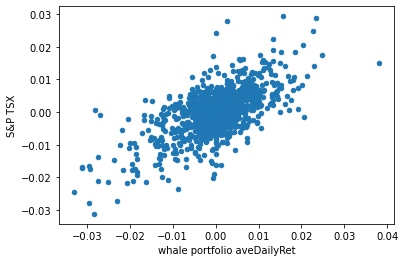

In [53]:
whale_mean = whale_df.mean(axis=1)
whale_mean.head()
whale_compare = pd.concat([whale_mean, sp_dailyReturns], axis="columns", join="inner")
whale_compare.columns = ['whale portfolio aveDailyRet', 'S&P TSX']
whale_compare.plot(kind="scatter", x="whale portfolio aveDailyRet", y="S&P TSX")
whale_compare.head(20)
whale_correlation = whale_compare.corr()
whale_correlation

,ALGO aveDailyRet,S&P TSX
ALGO aveDailyRet,1.000000,0.633538
S&P TSX,0.633538,1.000000


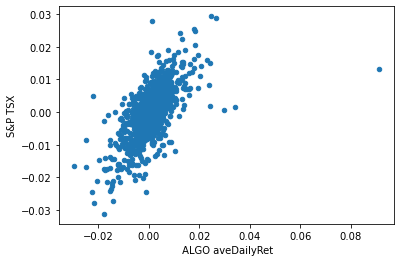

In [54]:
algo_mean = algo_df.mean(axis=1)
algo_mean.head()
algo_compare = pd.concat([algo_mean, sp_dailyReturns], axis="columns", join="inner")
algo_compare.columns = [' ALGO aveDailyRet', 'S&P TSX']
algo_compare.plot(kind="scatter", x=" ALGO aveDailyRet", y="S&P TSX")
algo_correlation = algo_compare.corr()
algo_correlation

In [55]:
#after comparing the correlation it is clear that the whale portfolio mimicks the S&P to a greater degree then the Algo portfolio
#since the correlation number of the whale portfolio is closer to 1 then the algo portfolio

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

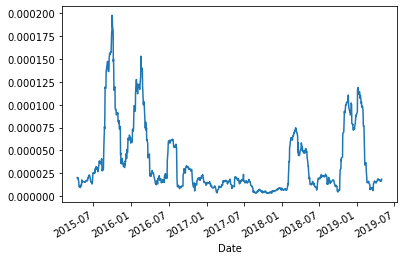

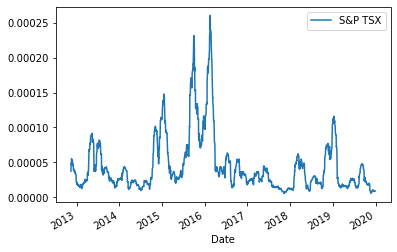

In [56]:
# Calculate covariance of a single portfolio
#make whale mean and S&P into one data frame
whale_SP = pd.concat([whale_mean, sp_dailyReturns], axis="columns", join="inner")
whale_SP.columns = ["WhaleDR", "S&PDR"]
whale_cov = whale_SP['WhaleDR'].cov(whale_SP['S&PDR'])

# Calculate variance of S&P TSX
spVar = sp_dailyReturns.var()

# Computing beta
whale_beta = whale_cov/spVar
whale_beta

# Plot beta trend
rolling_covariance = whale_SP['WhaleDR'].rolling(window=30).cov(whale_SP['S&PDR'])
rolling_variance = sp_dailyReturns.rolling(window=30).var()
rolling_covariance.plot()
rolling_variance.plot()
rolling_beta = rolling_covariance/rolling_variance
#can't get the rolling beta graph to work
#rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [57]:
# Use `ewm` to calculate the rolling window
all_dailyReturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,l-dailyReturns,otex-dailyReturns,shopify-dailyReturns
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.010002,-0.011703,0.023398
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000174,-0.003715,0.017092
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.000000,-0.007924,-0.001455
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.009753,-0.009631,0.016392
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.008969,-0.000712,-0.011254


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [58]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_dailyReturns.mean()-all_dailyReturns['S&P TSX'].mean()) * 252) / (all_dailyReturns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.111773
PAULSON & CO.INC.             -0.426319
TIGER GLOBAL MANAGEMENT LLC   -1.407236
BERKSHIRE HATHAWAY INC         0.180806
Algo 1                         1.872846
Algo 2                        -0.003555
S&P TSX                        0.000000
l-dailyReturns                 0.511516
otex-dailyReturns              0.747559
shopify-dailyReturns           1.568480
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

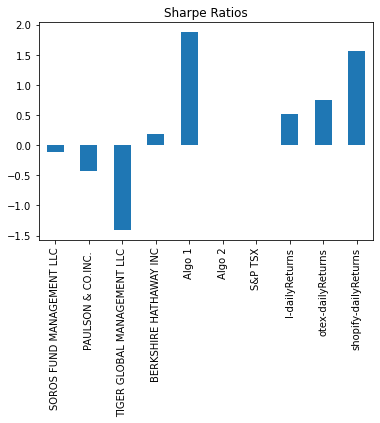

In [59]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic strategies do outperfom both the market(S&P) and the whales portfolios. This can be attributed to the fact that alot of the stocks with in the whale portfolios are negative, meaning the S&P out performes the  whale portfolios. Both the algoriths in the algo portfolio have a sharpe ratio greater then 0 suggesting that they have a better risk-adjusted performance compared to the S&P. Thefore the algo strategies outperform both the S&P and the Whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [60]:
# Reading data from 1st stock
l_data = Path("Resources/l_historical.csv")
l_df = pd.read_csv(l_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df.drop('Symbol', inplace = True, axis=1)
l_df = l_df.pct_change().dropna()
l_df.head()

,Close
Date,
2018-01-03,-0.010002
2018-01-04,0.000174
2018-01-05,0.000000
2018-01-08,-0.009753
2018-01-09,0.008969


In [61]:
# Reading data from 2nd stock
otex_data = Path("Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.drop('Symbol', inplace = True, axis=1)
otex_df = otex_df.pct_change().dropna()
otex_df.head()

,Close
Date,
2018-01-03,-0.011703
2018-01-04,-0.003715
2018-01-05,-0.007924
2018-01-08,-0.009631
2018-01-09,-0.000712


In [62]:
# Reading data from 3rd stock
shop_data = Path("Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.drop('Symbol', inplace = True, axis=1)
shop_df = shop_df.pct_change().dropna()
shop_df.head()

,Close
Date,
2018-01-03,0.023398
2018-01-04,0.017092
2018-01-05,-0.001455
2018-01-08,0.016392
2018-01-09,-0.011254


In [63]:
# Combine all stocks in a single DataFrame
my_port = pd.concat([l_df, otex_df, shop_df], axis="columns", join="inner")
my_port

,Close,Close,Close
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


In [64]:
# Reset Date index
#done

In [65]:
# Reorganize portfolio data by having a column per symbol
my_port.columns = ['l-dailyReturns', 'otex-dailyReturns', 'shopify-dailyReturns']
my_port.head()

,l-dailyReturns,otex-dailyReturns,shopify-dailyReturns
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


In [66]:
# Calculate daily returns
# Drop NAs
my_port.dropna()
# Display sample data
my_port.head()

,l-dailyReturns,otex-dailyReturns,shopify-dailyReturns
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

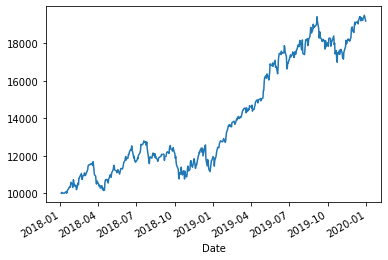

In [67]:
# Set weights
initial_investment = 10000
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = my_port.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_profit = initial_investment * cumulative_returns
# Display sample data
cumulative_profit.plot()


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [68]:
# Join your returns DataFrame to the original returns DataFrame
all_dailyReturns = pd.concat([all_dailyReturns, my_port], axis="columns", join="inner")
all_dailyReturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,l-dailyReturns,otex-dailyReturns,shopify-dailyReturns,l-dailyReturns,otex-dailyReturns,shopify-dailyReturns
Date,,,,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.010002,-0.011703,0.023398,-0.010002,-0.011703,0.023398
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000174,-0.003715,0.017092,0.000174,-0.003715,0.017092
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.000000,-0.007924,-0.001455,0.000000,-0.007924,-0.001455
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.009753,-0.009631,0.016392,-0.009753,-0.009631,0.016392
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.008969,-0.000712,-0.011254,0.008969,-0.000712,-0.011254


In [69]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_dailyReturns.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,l-dailyReturns,otex-dailyReturns,shopify-dailyReturns,l-dailyReturns,otex-dailyReturns,shopify-dailyReturns
Date,,,,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.010002,-0.011703,0.023398,-0.010002,-0.011703,0.023398
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000174,-0.003715,0.017092,0.000174,-0.003715,0.017092
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.000000,-0.007924,-0.001455,0.000000,-0.007924,-0.001455
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.009753,-0.009631,0.016392,-0.009753,-0.009631,0.016392
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.008969,-0.000712,-0.011254,0.008969,-0.000712,-0.011254


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized `std`
daily_std = all_dailyReturns.std()
daily_std = daily_std.sort_values(ascending=False)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

shopify-dailyReturns      0.504079
shopify-dailyReturns      0.504079
BERKSHIRE HATHAWAY INC    0.227445
otex-dailyReturns         0.225703
otex-dailyReturns         0.225703
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

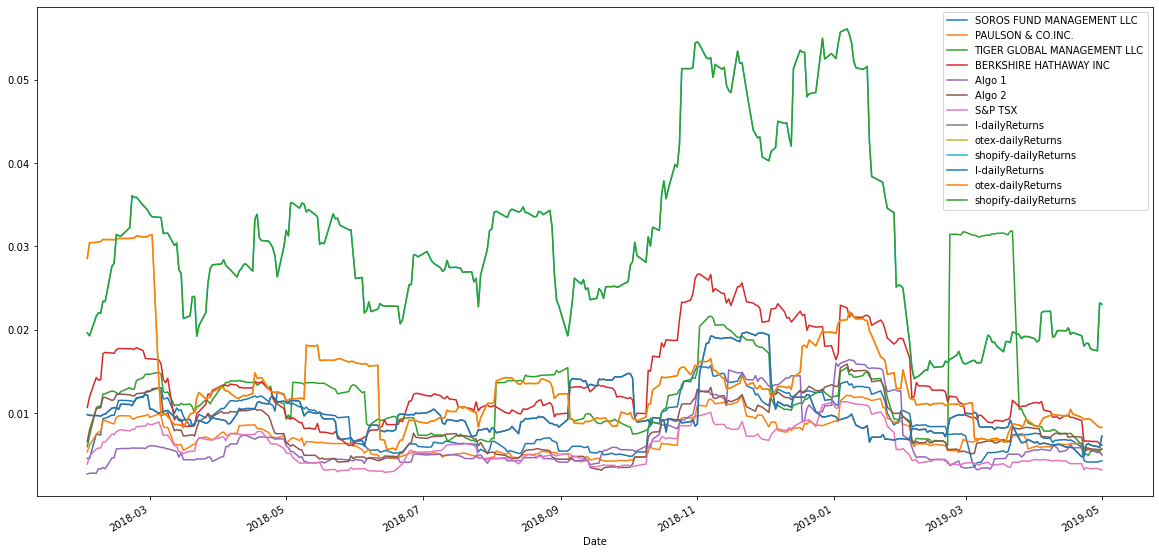

In [71]:
# Calculate rolling standard deviation
rolling_std = all_dailyReturns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize = [20,10])

### Calculate and plot the correlation

,my daily returns,S&P TSX
my daily returns,1.000000,0.539827
S&P TSX,0.539827,1.000000


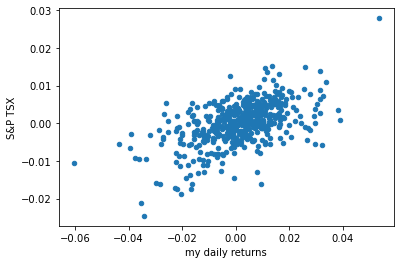

In [72]:
# Calculate and plot the correlation
# correlation between my portfolio and the S&P
my_mean = my_port.mean(axis=1)
my_mean.columns = ['my daily returns']
my_mean.head()
my_compare = pd.concat([my_mean, sp_dailyReturns], axis="columns", join="inner")
my_compare.columns = ['my daily returns', 'S&P TSX']
my_compare.plot(kind="scatter", x="my daily returns", y="S&P TSX")
my_compare.head(20)
my_correlation = my_compare.corr()
my_correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

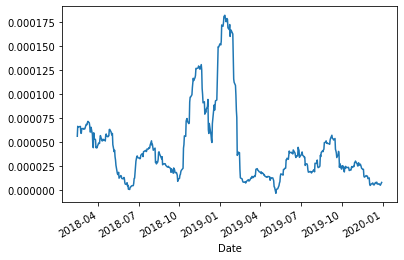

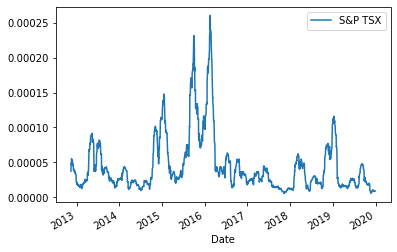

In [73]:
# Calculate and plot Beta
#make my mean and S&P into one data frame
my_SP = pd.concat([my_mean, sp_dailyReturns], axis="columns", join="inner")
my_SP.columns = ["myDR", "S&PDR"]
my_cov = my_SP['myDR'].cov(my_SP['S&PDR'])

# Calculate variance of S&P TSX
spVar = sp_dailyReturns.var()

# Computing beta
my_beta = my_cov/spVar
my_beta


roll_covariance = my_SP['myDR'].rolling(window=30).cov(my_SP['S&PDR'])
roll_variance = sp_dailyReturns.rolling(window=30).var()
roll_covariance.plot()
roll_variance.plot()
roll_beta = roll_covariance/roll_variance
#can't get the rolling beta graph to work
#rolling_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = ((all_dailyReturns.mean()-0) * 252) / (all_dailyReturns.std() * np.sqrt(252))
shapre_ratios = sharpe_ratios.sort_values(ascending = False)
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

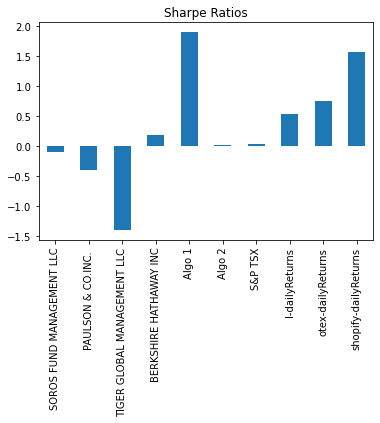

In [47]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

From all the analysis done, my portfolio out perfromes the whale portfolio, the algo portfolio and the S&P portfolio. My portfolio shows a resonable level of standard deviation while also showing a high level of correlation to the S&P meaning that when the S&P goes up my portfolio will recieve higher gains. My portfolio also has a resonably high sharpe ratio suggesting that it has better risk-adjusted performance compared to the S&P. Thefore the my portfolio outperforms both the S&P, the Whale portfolio and the algo portfolio.